# Primeri uporabe simbolnega računa za izračun prehodnega pojava RLC vezja 



<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na Githubu na https://github.com/osnove/Dodatno/
</div>

Rešujemo enačbo

$0=\frac{\text{d}i}{\text{d}t}R+\frac{1}{C}i+L\frac{{{\text{d}}^{\text{2}}}i}{\text{d}{{t}^{2}}}$.

Ta problem je bolj obširno rešen in razložen na strani https://github.com/osnove/Dodatno/blob/master/Primer_diff_enacbe_analiticno-numericno_RLC.ipynb
V tem zvezku si bomo ogledali nekoliko drugačen zapis, ki se ga pogosto uporabi pri analizi RLC vezja.


Običajno se za analizo odziva obravnavane diferencialne enačbe le to nekoliko predela. In sicer tako, da se jo deli z $L$ in iz $\frac{{{\text{d}}^{\text{2}}}i}{\text{d}{{t}^{2}}}+\frac{\text{d}i}{\text{d}t}R/L+\frac{1}{C L}i=0$ zapiše obliko
$\frac{{{\text{d}}^{\text{2}}}i}{\text{d}{{t}^{2}}}+2 \alpha \frac{\text{d}i}{\text{d}t}+\omega _0^2 i=0$, kjer je očitno $\alpha = \frac{R}{2L}$ in $\omega _0 = \frac{1}{\sqrt {C L}}$. $\omega_0$ imenujemo krožna resonančna frekvenca, $\alpha$ pa je faktor dušenja oz. atenuacije. 

Za več, si poglej na primer https://en.wikipedia.org/wiki/RLC_circuit 

Priprava potrebnih knjižnic:

In [1]:
import numpy as np
from sympy import *
from IPython.display import *
import matplotlib.pyplot as plt
%matplotlib inline 
init_printing(use_latex=True)
#import warnings
#warnings.filterwarnings('ignore')

Priprava simbolnih spremenljivk, zapis differencialne enačbe in reševanje z uporabo funkcije $dsolve$.

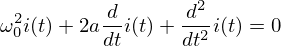

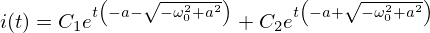

In [37]:
var('R C L t  Ug i0 C1 C2') # priprava spremenljivk
om=symbols('\omega_0')
alfa=symbols('a')
i = Function("i")(t) # funkcija toka
de = Eq(i.diff(t,2)+2*alfa*i.diff(t)+(om*om)*i) # zapis diferencialne enačbe
display(de) # izpis enačbe
des = dsolve(de,i) # rešitev enačbe
display(des) # izpis rešitve


Rešitev vsebuje konstanti $C_1$ in $C_2$, ki ju moramo izraziti z začetnimi pogoji. 
Konstanto $C_1$ bomo zamenjali z začetnim pogojem za tok, t.j. $i(t=0)=0$.

To naredimo tako, da izrazimo enačbo za čas $t=0$ in jo rešimo za $C_1$.

In [38]:
t0=des.args[1].subs({'t':0})
eq_init = Eq(i0, t0)  # izrazimo enačbo pri t=0
display(eq_init)  # prikažemo i0

init1_solve=solve(eq_init, C1) # rešimo enačbo za C1

display(init1_solve)  # prikažemo rešitev

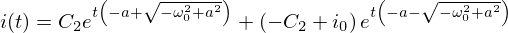

In [39]:
C1_solve = des.subs(C1, init1_solve[0]) # v rešitev vstavimo C1 in dobimo
C1_solve

In [40]:
expand(C1_solve)  # drugačen izpis

Vstavimo začetni pogoj $i(t=0)=i_0=0$ in za krajši zapis nadomestimo $R_1=\sqrt {R^2-\frac{4 l}{C}}$.

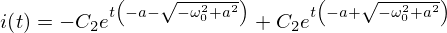

In [41]:
zacetni_pogoji = {'i0': 0}
i2=C1_solve.subs(zacetni_pogoji)
R_1=symbols('R_1')
i2b=i2.subs(sqrt(R**2-4*L/C),R_1)
display(i2b)

Poiščemo še rešitev za $C_2$ iz odvoda toka. Ker je odvod toka krat induktivnost enaka napetosti na tuljavi $u_L=L \frac{di}{dt}$, je torej potrebno pogledati, kolikšna je ta napetost ob preklopu. Ker se napetost na kondenzatorju ob preklopu ne more spremeniti, bo ta ob preklopu enaka nič, prav tako bo ob preklopu enaka nič tudi napetost na uporu, saj je tok ob preklopu enak nič. Torej bo vsa napetost ob preklopu na tuljavi in bo kar enaka napetosti vira $u_L(t=0)=U_g$. Iz tega sledi, da bo $u_L(t=0)=L \frac{di(t=0)}{dt}=U_g$ oziroma $\frac{di(t=0)}{dt}=U_g/L$.

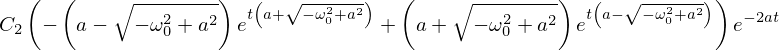

In [42]:
C2=symbols('C2')
C2_solve=i2b.rhs.diff(t) # izračunamo odvod
simplify(C2_solve) # izpišemo odvod

Zgornja enačba izraža odvod toka po času. Sedaj jo izrazimo ob času $t=0$ in $C_2$ izrazimo z odvodom pri t=0.

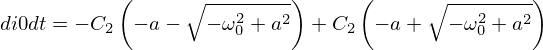

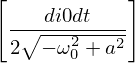

In [43]:
di0dt=symbols('di0dt')
t0=C2_solve.subs({'t':0})
eq_init2 = Eq(di0dt, t0)  # izrazimo enačbo pri t=0
display(eq_init2)  # prikažemo di/dt(t=0)

init2_solve=solve(eq_init2, C2) # rešimo enačbo za C2

display(simplify(init2_solve))  # prikažemo rešitev C2=

Končno obliko zapisa enačbe za $i(t)$ dobimo z nadomestitvijo konstante $C_2$ z odvodom toka  $\frac{di(t=0)}{dt}$, tega pa z  $U_g/L$.

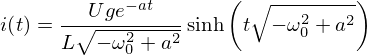

In [44]:
C3_solve = i2b.subs(C2, init2_solve[0]) # v rešitev vstavimo C2 in dobimo
C3_solve
i3=C3_solve.subs(di0dt,Ug/L) # Zamenjamo di/dt(0) z Ug/L
simplify(i3)

### Priprava za izračune in izris

Pripravimo podatke za izračune in izris. Za to uporabimo funkcijo $lambdify$, ki pretvori zapis enačbe iz simbolnega zapisa v funkcijo za numerične izračune. <a name='pripravi za izračune' />

In [48]:
podatki = {C:0.1, L: 10.02, R: 20.01,  Ug: 10}  # podam podatke v obliki "slovarja" (Dictionary), https://www.w3schools.com/python/python_dictionaries.asp
#podatki = {C:1e-5, L: 5e-3, R: 5, Ug: 2}  # podam podatke v obliki "slovarja" (Dictionary), https://www.w3schools.com/python/python_dictionaries.asp
alpha=R/(2*L)
print(alpha)
omega=1/sqrt(L*C)
alpha_subs=alpha.subs(podatki)  # Izračunam alfa
zeta=alpha/omega
zeta_subs=zeta.subs(podatki)
podatki["a"]= alpha_subs  # Dodam izračunano vrednost R1 v slovar
podatki[om]= omega.subs(podatki)  # Dodam izračunano vrednost R1 v slovar
print(zeta_subs)

print((podatki))

ifin=i3.subs(podatki)
print(ifin)
s='nadkritično dušenje'
if zeta_subs<1: 
    s='podkritično dušenje'
if zeta_subs > 0.9 and zeta_subs<1.1: s='kritično dušenje'
display(s) # Izpiše slovar

tok = lambdify(t, i3.args[1].subs(podatki), 'numpy') # tok kot funkcija časa

print('Tok pri 0s: {:g} A'.format(tok(1e-3))) # preverim tok za eno vrednost t


R/(2*L)
0.999500998253119
{C: 0.1, L: 10.02, R: 20.01, Ug: 10, 'a': 0.998502994011976, \omega_0: 0.999001497504367}
Eq(i(t), 15.8133650950391*I*exp(t*(-0.998502994011976 - 0.031555712083352*I)) - 15.8133650950391*I*exp(t*(-0.998502994011976 + 0.031555712083352*I)))


'kritično dušenje'

Tok pri 0s: 0.000997008+0j A


Sledi izris rezultatov. Za primerjavo rišemo primer kritičnega dušenja

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


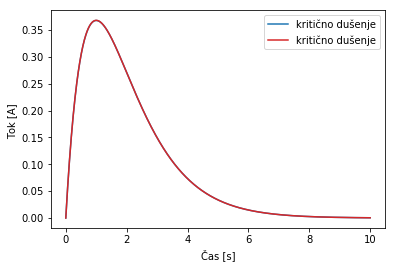

In [49]:
cas = np.linspace(0, 10, 1000) # spremeni po potrebi za drugačen izris

def slika():
    plt.plot(cas, (tok(cas)), 'C0',label=s)
    #ianalit=5*np.exp(-cas)*np.sin(2*cas)
    plt.plot(cas, [f(t,20,10,10) for t in cas], 'C3',label='kritično dušenje') # za primerjavo kritičnega odziva
    
    plt.xlabel('Čas [s]')
    plt.ylabel('Tok [A] ')
    plt.legend()
    plt.show()
slika()

### Opravi naslednje analize:
1. Spreminjaj upornost upora in opazuj spremembe.
2. Spreminjaj kapacitivnost kondenzatorja in opazuj spremembe.
3. Spreminjaj induktivnost tuljave in opazuj spremembe.


### Kratka razlaga
Opazovali smo odziv zaporedne vezave RLC vezja na priklop na enosmerni napetosti vir. 
Pred priklopom na vezje v vezju ni bilo toka, po izteku prehodnega pojava pa tudi ne, saj kondenzator "blokira" prehod toka. 
Na njem je po koncu prehodnega pojava celotna napetost vira. Odziv vezja je lahko precej različen, odvisen je od vrednosti elementov R, L in C. Te smo v konkretnem pprimeru "skrili" znotraj parametrov $\alpha = \frac{R}{2L}$ in $\omega _0 = \frac{1}{\sqrt {C L}}$.

Poleg tega tvorimo še en parameter (zeta), ki je $\zeta = \frac{\alpha}{\omega_0}$. Z vstavitvijo R, L in C pa je $ \zeta = \frac{R}{2} \sqrt\frac{C}{L}$. Ta faktor imenujemo faktor dušenja (damping factor), od njegove vrednosti je odvisna oblika odziva.

Za $ \zeta < 1$ je odziv vezja podkrtično dušenje, za $ \zeta > 1$ je dušenje nadkritično, za $ \zeta =1$ pa kritično.
Spreminjate lahko vrednosti parametrov in opazujete odziv vezja.


### Dodatni izračuni - napetosti na elementih vezja
Ko imamo rešitev za tok, lahko enostavno dobimo še zapise za napetosti na elementih vezja. 

Napetost na uporu je kar $u_R(t) = R i(t)$, napetost na tuljavi $u_L(t) = L \frac{di}{dt}$ in na kondenzatorju $u_C(t) = 1 / C \int {i dt}$. 

Ob integraciji je potrebno upoštevati še dodatno konstanto, ki jo je potrebno določiti iz začetnih pogojev. V konkretnem primeru bi morali določiti konstanto iz pogoja, da mora biti $u_C(t=0) = 0$. Temu dodatnemu delu se lahko izognemo tako, da namesto z integracijo toka  napetost na kondenzatorju določimo iz zveze $u_C(t) = Ug - u_L(t) - u_R(t)$.

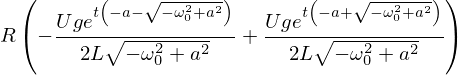

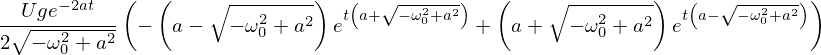

In [50]:
u_R=R*i3.rhs
display(u_R)
uR = lambdify(t, u_R.subs(podatki), 'numpy') # napetost na uporu
u_L=L*i3.rhs.diff(t)
display(simplify(u_L))
uL = lambdify(t, u_L.subs(podatki), 'numpy') # napetost na tuljavi
#print(uL(0))
# u_C=i3.rhs.integrate(t)/C
#display(u_C)
#uC = lambdify(t, u_C.subs(podatki), 'numpy') # tok kot funkcija časa
u_C=Ug-u_L-u_R
#display(simplify(u_C))
uC = lambdify(t, u_C.subs(podatki), 'numpy') # napetost na kondenzatorju

uRLC=lambdify(t, u_C.subs(podatki)+ u_R.subs(podatki)+ u_L.subs(podatki), 'numpy') # vsota vseh napetosti

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


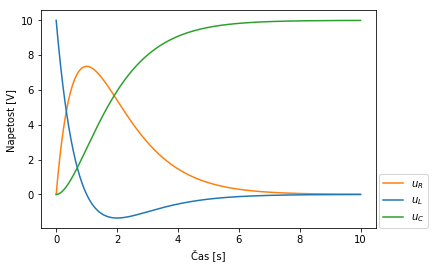

In [54]:
cas = np.linspace(0, 10, 1000)

def slika():
    #plt.plot(cas, tok(cas), 'C0', label='Tok [A]')
    plt.plot(cas, (uR(cas)), 'C1', label='$u_R $')
    plt.plot(cas, (uL(cas)), 'C0', label='$u_L $')
    plt.plot(cas, (uC(cas)), 'C2', label='$u_C $')
    #plt.plot(cas, (uRLC(cas)), '--', label='$u_R + u_L + u_C $') # iz neznanih razlogov včasih nagaja
    plt.xlabel('Čas [s]')
    plt.ylabel('Napetost [V] ')
    plt.legend(loc=(1.01, 0));
    plt.show()
slika()